# Image Enhancement using pixelwise operator

This notebook shows how to enhance images by transforming the pixel values of some input image, into new pixel values producing a better output image.

In [58]:
import numpy as np
import imageio 
import matplotlib.pyplot as plt

To illustrate different operators, let us create a vector with the 256 possible gray levels and work with that to show different types of transformations.

In [59]:
z = np.arange(256)
print(z)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

## Pixel-wise or point operators

Transform the value $z$ of some input in a new value $s$ via a transformation of the gray level interval. 

$s = T(z)$

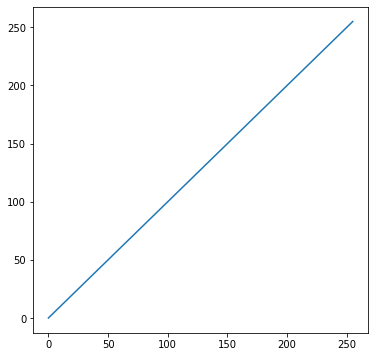

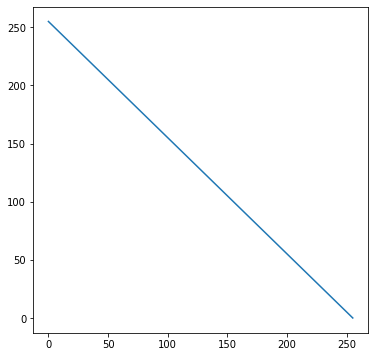

In [60]:
# identity 
s_ident = z

# inversion/negative
s_inver = 255 - z

plt.figure(figsize = (6,6)) # figure will appear with a square size (both directions have the same length)
plt.plot(z, s_ident)

plt.figure(figsize = (6,6)) 
plt.plot(z, s_inver)

### Logarithmic enhancement

Mathematical functions are useful to enhance images. The $log$ function in particular decreases the dynamic range between the gray levels so that dark pixels become more bright, while not oversaturating the already bright pixels. 

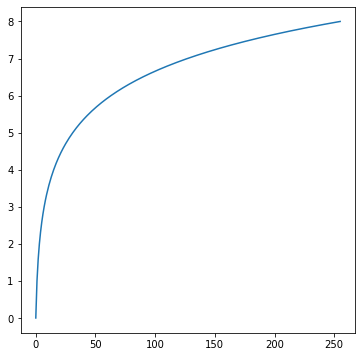

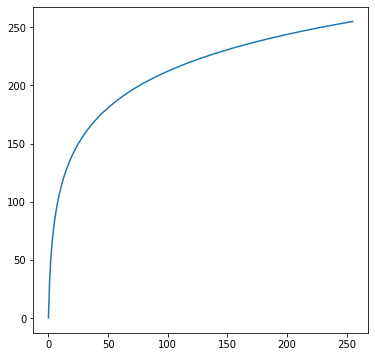

In [61]:
s_log2 = np.log2(z + 1)

plt.figure(figsize = (6,6))
plt.plot(z, s_log2)

# Scale factor
c_scale = 255 / (np.log2(1 + 255))

# Log scaled 
s_log2 = c_scale * np.log2(z + 1)
plt.figure(figsize = (6,6))
plt.plot(z, s_log2)

### Thresholding

Simple segmentation method, it is a step function that outputs only two values, relative to pixels outside or within regions of interest.

In [62]:
T = 100

indL = np.where(z > T)

### Gamma curve correction 

Adjust the graylevels using a power transformation. Useful to adjust the display, so that is better suits the human vision light perception curve:

$s = T(z) = r^\gamma$

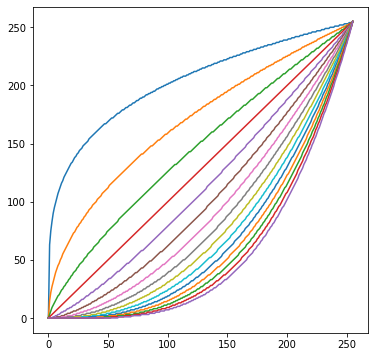

In [63]:
R = 255.00

plt.figure(figsize = (6, 6))

for gamma in np.arange(0.25, 4.0, 0.25):
    s_gamma = (R * np.power(z / R, gamma)).astype(np.uint8)
    plt.plot(z, s_gamma)

### Logistic function
Enhances contrast using sigmoid logistic function, that has an "S" shape.

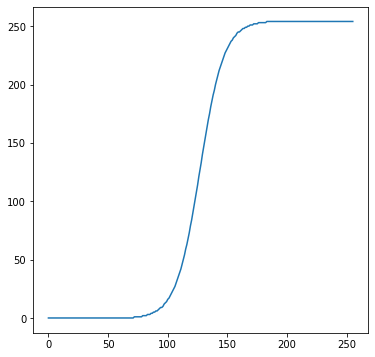

In [64]:
k = 0.1
s_sigmoid = (255 / (1 + np.exp(-k * (z - 127)))).astype(np.uint8)
plt.figure(figsize = (6, 6))
plt.plot(z, s_sigmoid)

In [65]:
import random 

A = np.random.randint(0, 8, [5, 5])
A

array([[5, 3, 0, 4, 2],
       [6, 3, 1, 3, 5],
       [5, 2, 3, 0, 6],
       [2, 6, 1, 6, 4],
       [4, 1, 0, 3, 6]])

In [66]:
def histogram(A, no_levels):
    hist = np.zeros(no_levels).astype(int)

    for i in range(no_levels):
        no_pixel_value_i = np.sum(A == i)
    
        hist[i] = no_pixel_value_i

    return hist

In [67]:
hist_A = histogram(A, 8)
print(hist_A)

[3 3 3 5 3 3 5 0]


Text(0, 0.5, 'Frequency')

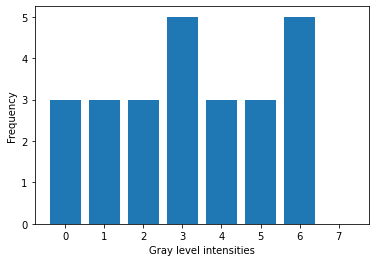

In [68]:
plt.bar(range(8), hist_A)
plt.xlabel("Gray level intensities")
plt.ylabel("Frequency")

In [69]:
def histogram_equal(A, no_levels):
    hist = histogram(A, no_levels)

    histC = np.zeros(no_levels).astype(int)
    histC[0] = hist[0]

    for i in range(1, no_levels):
        histC[i] = hist[i] + histC[i - 1]

    # Transfer function
    hist_transf = np.zeros(no_levels).astype(np.uint8)

    N, M = A.shape
    A_eq = np.zeros([N, M]).type(np.uint8)

    for z in range(no_levels):
        s = ((no_levels - 1) / float(M * N)) * histC[z]
        hist_transf[z] = s

        # For every coordinate in which A == z, replace it whit s
        A_eq[np.where(A == z)] = s

    return (A_eq, hist_transf)